<center><img src="img/Marca-ITBA-Color-ALTA.png" width="250">

<h1>Master en Management & Analytics</h1>
</center>


## Clase 5 - Naive Bayes

#### Referencias y bibliografía de consulta:

- Introduction to Machine Learning with Python by Andreas C. Müller and Sarah Guido (O’Reilly) 2017 
- An Introduction to Statistical Learning with Applications in R by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani (Springer) 2017 
- Python Machine Learning - Second Edition by Sebastian Raschka (Packt) 2017 
- https://scikit-learn.org/

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.colors import ListedColormap
%matplotlib inline

import seaborn as sns
sns.set(style = 'white')


### 1) Preprocesamiento de texto

En esta clase vamos a desarrollar un modelo de clasificación de texto. Por este motivo, vamos a comenzar la clase viendo técnicas de preprocesamiento de texto para transformarlo en una matriz de valores numéricos que podamos utilizar para entrenar un modelo. 

#### 1.1) Bag of Words

[Documentación de sklearn](https://scikit-learn.org/stable/modules/feature_extraction.html)

El **análisis de textos** es uno de los principales campos de aplicación de los algoritmos de machine learning. Sin embargo, los datos en bruto, una secuencia de símbolos, no pueden alimentar directamente a los algoritmos, ya que la mayoría de ellos esperan vectores de características numéricas con un tamaño fijo en lugar de los documentos de texto en bruto con longitud variable.

Para solucionar esto, scikit-learn proporciona utilidades para las formas más comunes de extraer características numéricas del contenido del texto, a saber:

- `Tokenizar` las cadenas y dar un identificador entero para cada posible token, por ejemplo, utilizando espacios en blanco y signos de puntuación como separadores de token.
- `Contar` las ocurrencias de los tokens en cada documento.
- `Normalizar` y ponderar con importancia decreciente los tokens que aparecen en la mayoría de las muestras/documentos.

En este esquema, las características y las muestras se definen como sigue:

- Cada frecuencia individual de aparición de tokens (normalizada o no) se trata como una feature.
- El vector de todas las frecuencias de token de un documento determinado se considera una muestra multivariante.

Así, un corpus de documentos puede representarse mediante una matriz con una fila por documento y una columna por token (por ejemplo, palabra) que aparezca en el corpus.

Llamamos **vectorización** al proceso general de convertir una colección de documentos de texto en vectores de características numéricas. Esta estrategia específica (tokenización, recuento y normalización) se denomina representación **"Bag of Words"** o "Bag of n-grams". Los documentos se describen por las ocurrencias de las palabras, ignorando por completo la información de la posición relativa de las palabras en el documento.

Como la mayoría de los documentos suelen utilizar un subconjunto muy pequeño de las palabras utilizadas en el corpus, la matriz resultante tendrá muchos valores de características que son ceros (normalmente más del 99% de ellos).

Por ejemplo, una colección de 10.000 documentos de texto cortos (como correos electrónicos) utilizará un vocabulario del orden de 100.000 palabras únicas en total, mientras que cada documento utilizará entre 100 y 1.000 palabras únicas individualmente.

Para poder almacenar una matriz de este tipo en la memoria, pero también para acelerar las operaciones algebraicas matriz / vector, las implementaciones suelen utilizar una representación dispersa como las implementaciones disponibles en el paquete `scipy.sparse`.

Importamos a la clase `CountVectorizer` que implementa tanto la tokenización como el conteo de ocurrencias:

In [2]:
from sklearn.feature_extraction.text import CountVectorizer


Instanciemos la clase con los parámetros por default.

In [3]:
vectorizer = CountVectorizer()
vectorizer

CountVectorizer()

Implementemos `CountVectorizer` para tokenizar y contar las ocurrencias de palabras de un corpus minimalista de documentos de texto:

In [4]:
corpus = ['This is the first document.',
          'This is the second second document.',
          'And the third one.',
          'Is this the first document?']

X = vectorizer.fit_transform(corpus)
X

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

Vemos que obtuvimos una representación dispersa.

A cada término encontrado por el analizador durante el ajuste se le asigna un índice entero único que corresponde a una columna de la matriz resultante. 
Con el método `get_feature_names()` obtenemos los nombres de las features:

In [5]:
vectorizer.get_feature_names() 

/home/ari/miniconda3/envs/itba/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

Esto es así porque instanciamos pasando el argumnto `vocabulary = None`. De este modo, el vocabulario se determina con el input con el que se hace el fit. 

Podemos visualizar el output del CountVectorizer utilizando el método `toarray()`, que convierte la **matrix dispersa a un array de Numpy**. También se podría usar el método `todense()`.

In [6]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 0, 1, 0, 2, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

¿Qué pasa si queremos vectorizar textos que contienen palabras que no estaban en el input original? 

Como no estaban contenidos en el input original, van a ser completamente ignorados:

In [7]:
vectorizer.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0]])

#### 1.2) n-gramas

Obsérvese que en el corpus anterior, el primer y el último documento tienen exactamente las mismas palabras, por lo que se codifican en vectores iguales. En particular, perdemos la información de que el último documento es una forma interrogativa. Para preservar parte de la información de ordenación local, podemos extraer 2-gramas (bigramas) de palabras además de las palabras individuales:

In [8]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2))
                                
analyze = bigram_vectorizer.build_analyzer() # el método `build_analyzer()` analiza un texto específico
analyze('Bi-grams are cool!')

['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool']

Generemos una nueva tokenización del corpus anterior utilizando bigramas:

In [9]:
X_2 = bigram_vectorizer.fit_transform(corpus).toarray()
X_2

array([[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]])

#### 1.3) Stopwords

Las `stopwords` son palabras como "y", "el", "él", que se suponen poco informativas para representar el contenido de un texto, y que pueden eliminarse para evitar que se interpreten como señal para la predicción. Sin embargo, a veces estas palabras son útiles para la predicción, por ejemplo para clasificar el estilo de escritura o la personalidad.

Diferentes listas de stopword pueden servir para diferentes problemas, por lo que hay que elegir con cuidado a las stopwords e incluso se pueden crear o custimizar listas ad-hoc para necesidades puntuales. 

In [10]:
sw_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')

X_3 = sw_vectorizer.fit_transform(corpus).toarray()

df_3 = pd.DataFrame(X_3, columns=sw_vectorizer.get_feature_names())
df_3

,document,second,second document,second second
0,1,0,0,0
1,1,2,1,1
2,0,0,0,0
3,1,0,0,0


Vemos que muchas de las palabras fueron filtradas por el stopwords. Verifiquémoslo:

In [11]:
'first' in sw_vectorizer.get_stop_words()

True

In [12]:
'one' in sw_vectorizer.get_stop_words()

True

#### 1.4) Tf-idf (term-frequency times inverse document-frequency)

En un corpus de texto de gran tamaño, algunas palabras estarán muy presentes (por ejemplo, "the", "a", "is" en inglés), por lo que aportan muy poca información significativa sobre el contenido real del documento. Si alimentáramos los datos de recuento directamente a un clasificador, esos términos muy frecuentes ensombrecerían las frecuencias de los términos más raros pero más interesantes.

Para reponderar las características de recuento en valores de punto flotante adecuados para su uso por un clasificador, es muy común utilizar la transformación tf-idf.

Siendo $t$ el término o token y $d$ el documento o instancia (fila del dataset):

  $tf-idf(t, d) = tf(t, d) * idf(t)$

$tf(t, d)$:  es el valor que da `CountVectorizer`.

Analicemos en detalle a $idf(t)$.

En el caso que `smooth_idf=False`:

$idf(t) = log [\frac{n}{df(t)} ] + 1$ 

donde $n$ es la cantidad total de documentos y $df(t)$ es el número de documentos donde aparece $t$.

Recordemos la función logarítmica:

<img src="img/log.png" width="400"  >

La expresión $n / df(t)$ va a valer 1 en el caso que $n = df(t)$, es decir si el token $t$ aparece en todos los documentos. En ese caso $log [ n / df(t) ] = 0$ y por lo tanto $idf(t) = 1 $. Luego, en cuantos menos documentos esté presente el término $t$, más alto va a ser el $idf(t)$.

¿Qué sucede si $df(t)= 0$? 

Para evitar divisiones por cero, se agregar un factor de suavizado `smooth_idf=True`, agregando una constante de valor “1” al numerador y al denominador:

$idf(d, t) = log [ \frac{1 + n}{1 + df(d, t)} ] + 1$

Por último, por default TfidfVectorizer normaliza las filas con norma L2.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))

X_tf_idf = tf_idf_vectorizer.fit_transform(corpus).toarray()

df_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf_vectorizer.get_feature_names())

df_tf_idf

/home/ari/miniconda3/envs/itba/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,and the,document,first,first document,is,is the,is this,one,second,...,second second,the,the first,the second,the third,third,third one,this,this is,this the
0,0.000000,0.000000,0.297522,0.367498,0.367498,0.297522,0.367498,0.000000,0.000000,0.000000,...,0.000000,0.243243,0.367498,0.000000,0.000000,0.000000,0.000000,0.297522,0.367498,0.000000
1,0.000000,0.000000,0.204544,0.000000,0.000000,0.204544,0.252653,0.000000,0.000000,0.640916,...,0.320458,0.167228,0.000000,0.320458,0.000000,0.000000,0.000000,0.204544,0.252653,0.000000
2,0.399288,0.399288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.399288,0.000000,...,0.000000,0.208365,0.000000,0.000000,0.399288,0.399288,0.399288,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.275715,0.340563,0.340563,0.275715,0.000000,0.431961,0.000000,0.000000,...,0.000000,0.225415,0.340563,0.000000,0.000000,0.000000,0.000000,0.275715,0.000000,0.431961


La norma L2 modifica a los datos de modo tal que la suma de los cuadrados de cada fila sume 1:

In [14]:
np.power(df_tf_idf,2).sum(axis=1)

0    1.0
1    1.0
2    1.0
3    1.0
dtype: float64

#### 1.5) Stemming y Lemmatization

El objetivo de las técnicas Stemming y Lemming es reducir la cantidad de tokens que se generan en la vectorización, al reducir las palabras a su raíz. De este modo, diferentes declinaciones de un concepto se mapean al concepto raiz. Por ejemplo 'jugar', 'jugamos' y 'jugador' se procesarían como un mismo token. 

La diferencia entre stemming y lemmatization es que stemming puede generar raíces que no formen parte del lenguaje, mientras que lemmatization busca generar tokens que sí lo sean. Vamos a entrar más en detalle en estas técnicas en la clase dedicada a text mining en la que vamos a trabajar con la librería `NLTK`.

### 2) Naive Bayes

#### 2.1) Gaussian Naive Bayes

Antes de avanzar con el modelo de clasificación de texto, veamos una implementación del modelo Naive Bayes Gaussiano sobre un dataset simulado. 

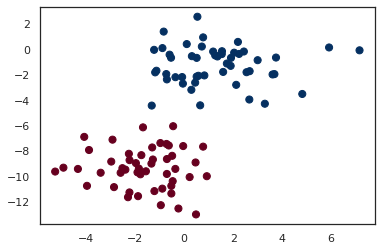

In [15]:
from sklearn.datasets import make_blobs


X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [16]:
# Ajustamos el modelo con los datos generados
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y);

In [17]:
rng = np.random.RandomState(0)
X_nueva = [-6, -14] + [14, 18] * rng.rand(2000, 2)
y_predicha = model.predict(X_nueva)

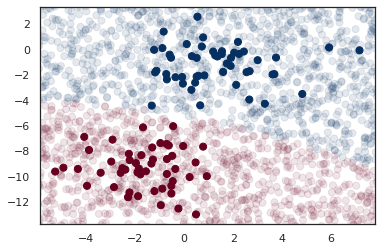

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(X_nueva[:, 0], X_nueva[:, 1], c=y_predicha, s=50, cmap='RdBu', alpha=0.1)
plt.axis(lim);

En el gráfico anterior se observa el "decision boundary" del modelo que surge a partir de suponer una distribución Gaussiana sobre cada una de las clases en los datos de entrenamiento.

#### 2.2) Multinomial Naive Bayes

##### Clasificación de reviews IMDB

In [19]:
dataset = pd.read_csv('data/IMDB Dataset.csv')

dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Veamos la cantidad de filas y de columnas que tiene el dataset:

In [20]:
print('El dataset tiene {} filas y {} columnas'.format(dataset.shape[0],dataset.shape[1]))

El dataset tiene 50000 filas y 2 columnas


Inspeccionamos cada columna del dataset:

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Observamos la distribución de las clases:

In [22]:
dataset.sentiment.value_counts(normalize=True)

positive    0.5
negative    0.5
Name: sentiment, dtype: float64

In [23]:
X = dataset['review']
y = dataset['sentiment']

In [24]:
print('Shape de X:', X.shape)
print('Shape de y:', y.shape)

Shape de X: (50000,)
Shape de y: (50000,)


In [25]:
y = y.apply(lambda x: 0 if x=='negative' else 1)

Hacemos el split entre sets de entrenamiento y testeo:

In [26]:
from sklearn.model_selection import train_test_split

rs=15

X_train, X_test, y_train, y_test = \
                    train_test_split(X, y, stratify=y, test_size=0.2, random_state=rs)

Vectorizamos las reseñas para crear la matriz de features:

In [27]:
vectorizer = TfidfVectorizer(stop_words='english')

X_train_bow = pd.DataFrame(vectorizer.fit_transform(X_train).toarray(), columns=vectorizer.get_feature_names())
X_test_bow = pd.DataFrame(vectorizer.transform(X_test).toarray(), columns=vectorizer.get_feature_names())

/home/ari/miniconda3/envs/itba/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/home/ari/miniconda3/envs/itba/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [28]:
X_train_bow.columns

Index(['00', '000', '00000000000', '0000000000001', '00000001', '00001',
       '00015', '000dm', '000s', '001',
       ...
       'úber', 'über', 'übermensch', 'übermenschlich', 'überwoman',
       'ünfaithful', 'üzümcü', 'ýs', 'þorleifsson', 'þór'],
      dtype='object', length=92598)

In [29]:
X_train_bow.shape

(40000, 92598)

Importamos el modelo multinomial de Naive Bayes y entrenamos el modelo:

In [30]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

#train the model 
clf.fit(X_train_bow, y_train)

MultinomialNB()

Evaluamos la performance del modelo:

In [31]:
# Elaboramos la matriz de confusión
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_train = clf.predict(X_train_bow)
y_pred_test = clf.predict(X_test_bow)

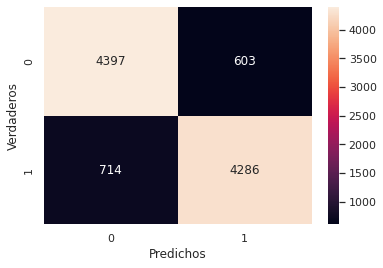

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred_test), annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [35]:
print(f"Accuracy score => {accuracy_score(y_test, y_pred_test)}")

Accuracy score => 0.8683





### ¡Muchas gracias por la atención!